## Import Libraries


In [ ]:
# Load Libraries
import pandas as pd
import numpy as np
from numpy import mean
import seaborn as sns
import matplotlib.pyplot as plt

## Pre-Processing
from nltk.tokenize import TweetTokenizer
from collections import Counter
import nltk
from nltk import corpus
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


## Read in Data

In [ ]:
# load the csv into runtime
traffic_tweets = pd.read_csv('athousandtweets.csv')
traffic_tweets.set_index(pd.to_datetime(traffic_tweets['Datetime']), inplace=True)

In [ ]:
## Subset tweets that are traffic related
traffic_tweets = traffic_tweets.loc[traffic_tweets["relation_label"] == 1]
traffic_tweets

,Unnamed: 0,Datetime,density_label,relation_label,Text,Username,UserLocation,ReplyCount,LikeCount,RetweetCount
Datetime,,,,,,,,,,
2022-03-29 17:14:19+00:00,1,2022-03-29 17:14:19+00:00,0,1.0,"#MTA #NYCSubways Downtown A, B, C, and D train...",WINSTRAFFICNYC,New York,0,0,0
2022-03-29 17:12:13+00:00,2,2022-03-29 17:12:13+00:00,0,1.0,CLEARED BUFFALO: DELAY Delays: WB on I-90 exit...,ThruwayTraffic,New York,0,0,0
2022-03-29 17:02:00+00:00,12,2022-03-29 17:02:00+00:00,1,1.0,"In #NassauCounty, westbound #SouthernStatePark...",WINSTRAFFICNYC,New York,0,0,0
2022-03-29 16:55:54+00:00,17,2022-03-29 16:55:54+00:00,2,1.0,UPDATE BUFFALO: DELAY Delays: WB on I-90 exit ...,ThruwayTraffic,New York,0,0,0
2022-03-29 16:54:18+00:00,18,2022-03-29 16:54:18+00:00,0,1.0,It will be an easy trip leaving or entering th...,WINSTRAFFICNYC,New York,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2022-03-28 01:48:20+00:00,987,2022-03-28 01:48:20+00:00,0,1.0,Construction on #FLine NB from Jay St - MetroT...,511nyBDFV,New York City,0,0,0
2022-03-28 01:48:20+00:00,988,2022-03-28 01:48:20+00:00,0,1.0,Construction on #JLine NB from Broad St to Cha...,511NY,New York State,0,0,0
2022-03-28 01:48:20+00:00,989,2022-03-28 01:48:20+00:00,0,1.0,Construction on #NLine Both directions from De...,511NY,New York State,0,0,0


In [ ]:
# A quick lock at the created Dataframe
traffic_tweets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 402 entries, 2022-03-29 17:14:19+00:00 to 2022-03-28 01:17:11+00:00
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      402 non-null    int64  
 1   Datetime        402 non-null    object 
 2   density_label   402 non-null    object 
 3   relation_label  402 non-null    float64
 4   Text            402 non-null    object 
 5   Username        402 non-null    object 
 6   UserLocation    402 non-null    object 
 7   ReplyCount      402 non-null    int64  
 8   LikeCount       402 non-null    int64  
 9   RetweetCount    402 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 34.5+ KB


In [ ]:
traffic_tweets.isna().sum()

Unnamed: 0        0
Datetime          0
density_label     0
relation_label    0
Text              0
Username          0
UserLocation      0
ReplyCount        0
LikeCount         0
RetweetCount      0
dtype: int64

In [ ]:
# Can you find out the right column for the actual tweets?
tweets = traffic_tweets['Text']

## Natural Language Processing

In [ ]:
# We can use the tweet tokenizer to parse these tweets:
tknzr = TweetTokenizer()

# parse the tweets
tweets_tokenized = [tknzr.tokenize(tweet) for tweet in tweets]

# print out the 10 first tweets in parsed
print(tweets_tokenized[:10])

[['#MTA', '#NYCSubways', 'Downtown', 'A', ',', 'B', ',', 'C', ',', 'and', 'D', 'trains', 'are', 'experiencing', 'delays', 'as', 'crews', 'repair', 'a', 'damaged', 'rail', 'at', '96th', 'Street', '.', '@1010WINS', '@MTA', 'https://t.co/8N3r0Cw0QY'], ['CLEARED', 'BUFFALO', ':', 'DELAY', 'Delays', ':', 'WB', 'on', 'I', '-', '90', 'exit', '48A', '-', 'exit', '49', ':', 'Delays', 'Slow', 'traffic', 'stopped', 'traffic', ':', 'Incident', 'clear', ',', 'traffic', 'normal', '.'], ['In', '#NassauCounty', ',', 'westbound', '#SouthernStateParkway', 'has', 'delays', 'approaching', 'Exit', '29N', 'for', 'Route', '107', 'with', 'construction', 'leaving', 'only', 'the', 'left', 'lane', 'open', '.', '@1010WINS', '@511nyLongIsland', 'https://t.co/K1LqPboCX7'], ['UPDATE', 'BUFFALO', ':', 'DELAY', 'Delays', ':', 'WB', 'on', 'I', '-', '90', 'exit', '48A', '-', 'exit', '49', ':', 'Delays', 'Slow', 'traffic', 'stopped', 'traffic'], ['It', 'will', 'be', 'an', 'easy', 'trip', 'leaving', 'or', 'entering', 'the

In [ ]:
# Get out all hashtags using loops

# create an empty list: hashtags
hashtags = []

# Filter hashtags
for tweet in tweets_tokenized:
    hashtags.extend([word for word in tweet if word.startswith('#')])
    
# Print out the first 20 hashtags to check
print(hashtags[:20])

['#MTA', '#NYCSubways', '#NassauCounty', '#SouthernStateParkway', '#HollandTunnel', '#LincolnTunnel', '#EssexCounty', '#WestOrange', '#3RDAVE', '#MTA', '#BEEKMANST', '#BEEKMANST', '#BEEKMANST', '#BEEKMANST', '#E74THST', '#Brooklyn', '#traffic', '#E54THST', '#E53RDST', '#3RDAVE']


In [ ]:
# Count all hashtags
hashtags_counter = Counter(hashtags)

# create an object and print out the most common 10 hashtags
most_common_10 = hashtags_counter.most_common(10)
print(most_common_10)

[('#traffic', 29), ('#DLine', 18), ('#I278', 14), ('#ELine', 14), ('#ALine', 12), ('#CLine', 12), ('#FLine', 11), ('#HollandTunnel', 9), ('#US19TonnelleAvenue', 9), ('#Brooklyn', 8)]


**Stopwords**


In [ ]:
# Importing stopwords

nltk.download("stopwords")


stopwords_en = stopwords.words('english')

# Let's import a lemmatizer from NLTK and try how it works


# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# We already imported the data above and can use it right away

# Tokenize each tweet
traffic_tweets['tokenized'] = traffic_tweets['Text'].map(lambda t: tknzr.tokenize(t))


In [ ]:
# lowecase, strip and ensure we only include words
traffic_tweets['tokenized'] = traffic_tweets['tokenized'].map(
    lambda t: [word.lower().strip() for word in t if word.isalpha()])

In [ ]:
# lemmarize and remove stopwords
#import nltk
nltk.download('wordnet')

traffic_tweets['tokenized'] = traffic_tweets['tokenized'].map(
    lambda t: [wordnet_lemmatizer.lemmatize(word) for word in t 
               if word not in stopwords_en])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:

tokenized = traffic_tweets['tokenized'].values
mystring = ''
corpus = []
for j in tokenized:
  for x in j:
    mystring += ' ' + x
  corpus.append(mystring)
  mystring = ''
  #print(j)
corpus


[' downtown b c train experiencing delay crew repair damaged rail street',
 ' cleared buffalo delay delay wb exit exit delay slow traffic stopped traffic incident clear traffic normal',
 ' westbound delay approaching exit route construction leaving left lane open',
 ' update buffalo delay delay wb exit exit delay slow traffic stopped traffic',
 ' easy trip leaving entering city travel time ten minute inbound outbound',
 ' eastbound route three lane blocked near exit emergency roadwork',
 ' cleared construction nb st st',
 ' update buffalo delay wb exit exit delay slow traffic stopped traffic',
 ' matoc road closure george washington parkway sb va fairfax county va lane blocked southbound traffic turn around northbound lane follow police direction area delay building',
 ' matoc update tractor trailer crash injury nb md exit pg co md lane nb remain blocked traffic turned around southbound lane follow police direction area nb delay begin md sb lane open delay appx mile',
 ' despite overni

In [ ]:
# Bag-of-words data transformation

bow_vector = CountVectorizer(ngram_range=(1,1))

X = bow_vector.fit_transform(corpus)
y = traffic_tweets['density_label']
#y = traffic_tweets['label']

## Model Building


In [ ]:
np.random.seed(440)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 25)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
# Multinomial Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Logistic Regression Classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# SVM Classifier
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
print('Naive Bayes: {}'.format(nb.score(X_test, y_test)))
print('SVM: {}'.format(svm.score(X_test, y_test)))
print('Logistic Regression: {}'.format(lr.score(X_test, y_test)))

Naive Bayes: 0.7037037037037037
SVM: 0.8024691358024691
Logistic Regression: 0.8024691358024691


In [ ]:
nby_pred = nb.predict(X_test)
svmy_pred = svm.predict(X_test)
lry_pred = lr.predict(X_test)

In [ ]:
print(classification_report(y_test, nby_pred))
print(classification_report(y_test, svmy_pred))
print(classification_report(y_test, lry_pred))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76        39
           1       0.71      0.38      0.50        26
           2       0.81      0.81      0.81        16

    accuracy                           0.70        81
   macro avg       0.73      0.69      0.69        81
weighted avg       0.71      0.70      0.68        81

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        39
           1       0.77      0.65      0.71        26
           2       0.81      0.81      0.81        16

    accuracy                           0.80        81
   macro avg       0.80      0.79      0.79        81
weighted avg       0.80      0.80      0.80        81

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        39
           1       0.69      0.69      0.69        26
           2       0.93      0.81      0.87        16

    accuracy        

## Parameter Tuning

In [ ]:
# NB Parameters
alpha = [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 0, 1]
grid_nb = dict(alpha=alpha)

In [ ]:
# Logistic Regression Parameters
penalty = ["l1", "l2", "elasticnet", "none"]
C_lr = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tol_lr = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
max_iter_lr = [100, 500, 1000, 2500, 5000]
grid_lr = dict(penalty=penalty, C=C_lr, tol=tol_lr, solver=solver, max_iter=max_iter_lr)

In [ ]:
# SVM Parameters
kernel = ["linear", "poly", "rbf", "sigmoid"]
degree = [1, 2, 3, 4, 5]
C_svm = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tol_svm = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
max_iter_svm = [-1, 100, 500, 1000, 2500, 5000]
gamma = ["scale", "auto"]
grid_svm = dict(kernel=kernel, C=C_svm, tol=tol_svm, gamma=gamma, degree=degree, max_iter=max_iter_svm)

In [ ]:
# NB Random Random Grid Search

cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

randomSearch = RandomizedSearchCV(estimator=nb, n_jobs=-1,
	cv=cvFold, param_distributions=grid_nb,
	scoring="f1_weighted")

searchResults = randomSearch.fit(X_val, y_val)

# extract the best model and evaluate it
print("[INFO] evaluating...")
bestModel_nb = searchResults.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[INFO] evaluating...


In [ ]:
# Metrics from improved NB model
print(classification_report(y_test, nb.predict(X_test)))
print(classification_report(y_test, bestModel_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76        39
           1       0.71      0.38      0.50        26
           2       0.81      0.81      0.81        16

    accuracy                           0.70        81
   macro avg       0.73      0.69      0.69        81
weighted avg       0.71      0.70      0.68        81

              precision    recall  f1-score   support

           0       0.60      0.69      0.64        39
           1       0.48      0.42      0.45        26
           2       0.82      0.56      0.67        16
           q       0.00      0.00      0.00         0

    accuracy                           0.58        81
   macro avg       0.47      0.42      0.44        81
weighted avg       0.60      0.58      0.59        81



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# LR Random Random Grid Search

cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

randomSearch = RandomizedSearchCV(estimator=lr, n_jobs=-1, cv = cvFold, param_distributions=grid_lr,
	scoring="f1_weighted")

searchResults = randomSearch.fit(X_val, y_val)

# extract the best model and evaluate it
print("[INFO] evaluating...")
bestModel_lr = searchResults.best_estimator_

[INFO] evaluating...


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

In [ ]:
# Metrics from improved LR model
print(classification_report(y_test, lr.predict(X_test)))
print(classification_report(y_test, bestModel_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        39
           1       0.69      0.69      0.69        26
           2       0.93      0.81      0.87        16

    accuracy                           0.80        81
   macro avg       0.82      0.79      0.80        81
weighted avg       0.80      0.80      0.80        81

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        39
           1       0.69      0.42      0.52        26
           2       0.93      0.81      0.87        16

    accuracy                           0.74        81
   macro avg       0.77      0.72      0.73        81
weighted avg       0.74      0.74      0.72        81



In [ ]:
# SVM Random Random Grid Search

randomSearch = RandomizedSearchCV(estimator=svm, n_jobs=-1,
	cv=cvFold, param_distributions=grid_svm,
	scoring="f1_weighted")

searchResults = randomSearch.fit(X_val, y_val)

# extract the best model and evaluate it
print("[INFO] evaluating...")
bestModel_svm = searchResults.best_estimator_

[INFO] evaluating...


In [ ]:
# Metrics from improved SVM model
print(classification_report(y_test, svm.predict(X_test)))
print(classification_report(y_test, bestModel_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        39
           1       0.77      0.65      0.71        26
           2       0.81      0.81      0.81        16

    accuracy                           0.80        81
   macro avg       0.80      0.79      0.79        81
weighted avg       0.80      0.80      0.80        81

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        39
           1       0.59      0.38      0.47        26
           2       0.92      0.75      0.83        16

    accuracy                           0.70        81
   macro avg       0.73      0.68      0.69        81
weighted avg       0.70      0.70      0.69        81



## Stress Testing

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False ,fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

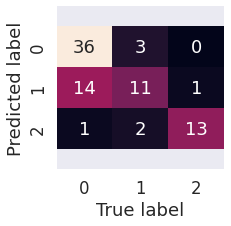

In [ ]:
mat = plot_conf_mat(y_test, bestModel_lr.predict(X_test))

In [ ]:
loo = LeaveOneOut()

scores = cross_val_score(bestModel_lr, X, y, scoring = "f1_weighted",
                         cv=loo, n_jobs=-1)
mean(scores)

0.8482587064676617

In [ ]:
data = {"x":y_test, "labels":bestModel_lr.predict(X_test)}
df = pd.DataFrame(data)
df

,x,labels
Datetime,,
2022-03-29 02:30:03+00:00,1,2
2022-03-28 20:37:26+00:00,0,0
2022-03-28 06:08:12+00:00,2,2
2022-03-28 08:59:12+00:00,0,0
2022-03-28 09:03:23+00:00,0,0
...,...,...
2022-03-29 15:52:42+00:00,1,0
2022-03-29 06:21:57+00:00,1,0
2022-03-29 12:02:28+00:00,1,0


In [ ]:
df.to_csv("predicted_density_labels.csv")
from google.colab import files
files.download("predicted_density_labels.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Exporting tokenized df
#traffic_tweets.to_csv('threehundredtweets_tokenized.csv')
#from google.colab import files
#files.download("threehundredtweets_tokenized.csv")